In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
check = cv2.imread('newcheck.jpeg', 0)
og = cv2.imread('newcheck.jpeg')

_, check = cv2.threshold(check, 100, 255, cv2.THRESH_BINARY_INV)

canny = cv2.Canny(check, 30, 100)
abc = cv2.cvtColor(check, cv2.COLOR_GRAY2RGB)
temp = og * abc
# canny = cv2.dilate(canny, np.ones((3, 3)),iterations=2)
test = cv2.resize(canny, (500, 500))
cv2.imshow('canny', temp)
cnts = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
new = check.copy()
cv2.drawContours(check, [c], 0, (0, 255, 0), 50)

contours = [
    np.array([[100, 180], [200, 280], [200, 180]]),
    np.array([[280, 70], [12, 20], [80, 150]])
]

stencil = np.zeros(new.shape).astype(new.dtype)

# test = cv2.fillPoly(stencil, contours, [255, 255, 255])
test = cv2.resize(check, (500, 500))

result = cv2.bitwise_or(new, stencil)

result = cv2.resize(result, (500, 500))
cv2.imshow('title', test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
image_name = 'IMG_20190203_1151202.jpg'
og = cv2.imread(image_name)
gray = cv2.imread(image_name, 0)

_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

cv2.imwrite('canndsyjasjdn.jpg', thresh)

rgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

canny = cv2.Canny(thresh, 30, 100)
canny = cv2.dilate(canny, None,iterations=2)
cnts = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(c)

cropped = og[y:y + h, x:x + w]
cropped_rgb = rgb[y:y + h, x:x + w]

cropped[cropped_rgb < 50] = 0
resized = cv2.resize(cropped, (1000, 1000))
cv2.imwrite('jasjdn.jpg', cropped)

# cv2.imshow('title', resized)
# cv2.waitKey(0)
cv2.destroyAllWindows()

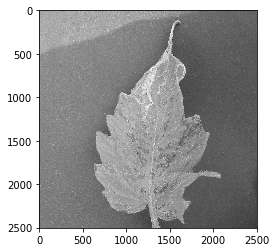

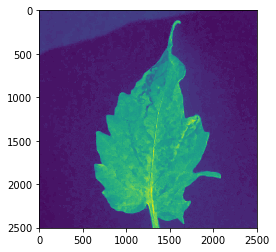

128 [1267574.] [126757.4]
129 [789228.] [126757.4]
130 [662701.] [126757.4]
131 [686079.] [126757.4]
132 [260999.] [126757.4]
133 [199801.] [126757.4]
134 [277945.] [126757.4]
135 [160062.] [126757.4]
136 [30335.] [126757.4]
126 136 [126757.4] 128
[1267574.]


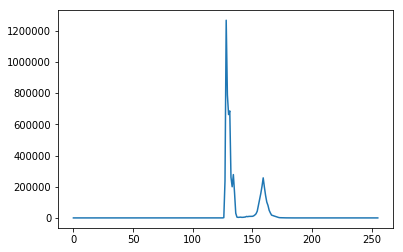

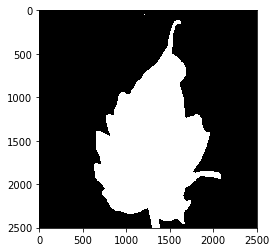

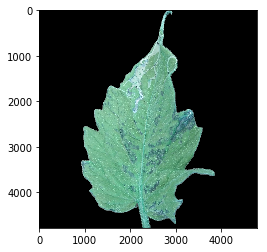

In [32]:
# /home/praneet/Projects/Plant_Monitor/dataset/non_segmented/early blight/segmented/IMG20190204142624.jpg
# /home/praneet/Projects/Plant_Monitor/dataset/non_segmented/bacterial spot/20190203_112443.jpg
image_name = '../dataset/non_segmented/late blight/indoors/IMG20190326124937.jpg'
og = cv2.imread(image_name)
gray = cv2.imread(image_name, 0)

lab = cv2.cvtColor(og, cv2.COLOR_BGR2LAB)

l, a, b = cv2.split(lab)
cv2.imwrite('gray.jpg', b)
plt.imshow(gray
, cmap='gray')
plt.show()
hist_full = cv2.calcHist([b],[0],None,[256],[0,256])

peak = np.argmax(hist_full)
max_score = hist_full[peak]
percent = 10 / 100
thresh_score = (max_score) * percent

_, thresh = cv2.threshold(b, 118, 131, cv2.THRESH_BINARY_INV)
plt.imshow(b)
plt.show()

for i in range(peak, 0, -1):
    if hist_full[i] < thresh_score:
        min_thresh = i
        break
        
for i in range(peak, 256):
    print(i, hist_full[i], thresh_score)
    if hist_full[i] < thresh_score:
        max_thresh = i
        break
print(min_thresh, max_thresh, thresh_score, peak)

print(hist_full[np.argmax(hist_full)])

plt.plot(hist_full)
plt.show()
b_component = b.copy()

b_component[b_component < min_thresh] = 255
b_component[b_component > max_thresh] = 255
b_component[b_component < 255] = 0

b_component = cv2.erode(b_component, None,iterations=2)
b_component = cv2.dilate(b_component, None,iterations=3)

# canny = cv2.Canny(b_component, 3, 3)
# plt.imshow(canny, cmap='gray')
# plt.show()

# canny = cv2.dilate(canny, None,iterations=3)
# plt.imshow(canny, cmap='gray')
# plt.show()

cnts = cv2.findContours(b_component.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(c)

rgb = cv2.cvtColor(b_component, cv2.COLOR_GRAY2RGB)
plt.imshow(rgb, cmap='gray')
plt.show()
cropped = og[y:y + h, x:x + w]
cropped_rgb = rgb[y:y + h, x:x + w]

cropped[cropped_rgb < 50] = 0

cropped = makeSquare(cropped)
plt.imshow(cropped, cmap='gray')
plt.show()
# cv2.imwrite('img_name.jpg', cropped)

# Final script to segment images

In [2]:
def makeSquare(not_square):
    # Adds black pixels as padding
    
    BLACK = [0, 0, 0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square, (2 * width, 2 * height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        if (height > width):
            pad = (height - width)/2
            pad = int(pad)
            #doublesize = int(doublesize)
            doublesize_square = cv2.copyMakeBorder(doublesize, 0, 0, pad,\
                                                  pad, cv2.BORDER_CONSTANT, value = BLACK)
        else:
            pad = (width - height)/2
            pad = int(pad)
            doublesize_square = cv2.copyMakeBorder(doublesize, pad, pad, 0, 0,\
                                                  cv2.BORDER_CONSTANT, value = BLACK)
    doublesize_square_dim = doublesize_square.shape
    return doublesize_square

In [3]:
def segment(final_path, disorder, img_name, img_path):
    # reading image
    og = cv2.imread(img_path)
    
    # converting RGB to LAB
    lab = cv2.cvtColor(og, cv2.COLOR_BGR2LAB)
    
    # splitting all channels
    l, a, b = cv2.split(lab)
    
    # saving b_component of LAB
    cv2.imwrite(final_path + 'b_component/' + disorder + '/' + img_name, b)
    
    # calculating histogram and threshold values for segmentation
    hist_full = cv2.calcHist([b],[0],None,[256],[0,256])

    peak = np.argmax(hist_full)
    max_score = hist_full[peak]
    percent = 10 / 100
    thresh_score = (max_score) * percent
    
    # calculating max and min threshold values
    for i in range(peak, 0, -1):
        if hist_full[i] < thresh_score:
            min_thresh = i
#             for j in range(i, 0, -1):
#                 if hist_full[min_thresh] > hist_full[j + 1]:
#                     min_thresh = j + 1
#                     break
#                 else:
#                     min_thresh = j
            break

    for i in range(peak, 256):
        if hist_full[i] < thresh_score:
            max_thresh = i
#             for j in range(i, 256):
#                 if hist_full[max_thresh] > hist_full[j - 1]:
#                     max_thresh = j - 1
#                     break
#                 else:
#                     max_thresh = j
            break
            
    # thresholding
    b_component = b.copy()

    b_component[b_component < min_thresh] = 255
    b_component[b_component > max_thresh] = 255
    b_component[b_component < 255] = 0

    b_component = cv2.erode(b_component, None,iterations=2)
    b_component = cv2.dilate(b_component, None,iterations=3)
    
    # finding contours to seperate background and foreground
    cnts = cv2.findContours(b_component.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    rgb = cv2.cvtColor(b_component, cv2.COLOR_GRAY2RGB)

    # cropping contours
    cropped = og[y:y + h, x:x + w]
    cropped_rgb = rgb[y:y + h, x:x + w]

    cropped[cropped_rgb < 50] = 0
    
    # resizing image to 256 x 256
    cropped = makeSquare(cropped)
    cropped = cv2.resize(cropped, (246, 246))
    cropped = cv2.copyMakeBorder(cropped, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value = [0, 0, 0])
    
    cropped_rgb = makeSquare(cropped_rgb)
    cropped_rgb = cv2.resize(cropped_rgb, (246, 246))
    cropped_rgb = cv2.copyMakeBorder(cropped_rgb, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value = [0, 0, 0])

    cv2.imwrite(final_path + 'thresholded/' + disorder + '/' + img_name, cropped_rgb)
    cv2.imwrite(final_path + 'segmented/' + disorder + '/' + img_name, cropped)


In [4]:
FINAL_PATH = '../dataset/final_dataset/'

for disorder in os.listdir(FINAL_PATH + 'raw/'):
    for image_name in tqdm(os.listdir(FINAL_PATH + 'raw/' + disorder)):
        img_path = FINAL_PATH + 'raw/' + disorder + '/' + image_name
        segment(FINAL_PATH, disorder, image_name, img_path)

100%|██████████| 56/56 [00:11<00:00,  6.03it/s]


# Script to rotate images

In [1]:
import cv2
import imutils
from tqdm import tqdm
import os

In [2]:
def rotate_images(FINAL_PATH, disorder, image_name, img_path, set_type):
    img = cv2.imread(img_path)
    
    if not os.path.exists(FINAL_PATH + 'rotated/' + set_type + '/' + disorder):
        os.mkdir(FINAL_PATH + 'rotated/' + set_type + '/' + disorder)
        
    cv2.imwrite(FINAL_PATH + 'rotated/' + set_type + '/' + disorder + '/' + image_name[:-4] + '_0.jpg', img)
    
    rotated_90 = imutils.rotate_bound(img, 90)
    cv2.imwrite(FINAL_PATH + 'rotated/' + set_type + '/' + disorder + '/' + image_name[:-4] + '_90.jpg', rotated_90)
    
    rotated_180 = imutils.rotate_bound(img, 180)
    cv2.imwrite(FINAL_PATH + 'rotated/' + set_type + '/' + disorder + '/' + image_name[:-4] + '_180.jpg', rotated_180)
    
    rotated_270 = imutils.rotate_bound(img, 270)
    cv2.imwrite(FINAL_PATH + 'rotated/' + set_type + '/' + disorder + '/' + image_name[:-4] + '_270.jpg', rotated_270)

In [5]:
FINAL_PATH = '../dataset/'
types = ['validation_set', 'train_set', 'test_set']

for set_type in types:
    for disorder in os.listdir(FINAL_PATH + 'split_sets/' + set_type):
        for image_name in tqdm(os.listdir(FINAL_PATH + 'split_sets/' + set_type + '/' + disorder)):
            img_path = FINAL_PATH + 'split_sets/' + set_type + '/' + disorder + '/' + image_name

            rotate_images(FINAL_PATH, disorder, image_name, img_path, set_type)

100%|██████████| 197/197 [00:00<00:00, 231.88it/s]


# Script to segregate into Train, Validation and Test

In [3]:
import random
import shutil
import os

In [4]:
VALIDATION = 0.2
TEST = 0.1
FINAL_PATH = '../dataset/mixed/'
VAL_DIR = '../dataset/validation_set/'
TEST_DIR = '../dataset/test_set/'

for directory in os.listdir(FINAL_PATH):
    images = os.listdir(FINAL_PATH + directory)
    
    if not os.path.exists(VAL_DIR + directory):
        os.mkdir(VAL_DIR + directory)
        os.mkdir(TEST_DIR + directory)
        
    val = int(len(images) * VALIDATION)
    test = int(len(images) * TEST)
    
    print(str(val) + ' validation images in total ' + str(len(images)))
    print(str(test) + ' test images in total ' + str(len(images)))
    
    # Validation
    for i in range(0, val):
        choice = random.choice(images)
        del images[images.index(choice)]
        shutil.move(FINAL_PATH + directory + '/' + choice, VAL_DIR +  directory + '/' + choice)
        
    # Test
    for i in range(0, test):
        choice = random.choice(images)
        del images[images.index(choice)]
        shutil.move(FINAL_PATH + directory + '/' + choice, TEST_DIR +  directory + '/' + choice)

200 validation images in total 1000
100 test images in total 1000
7 validation images in total 37
3 test images in total 37
30 validation images in total 152
15 test images in total 152
15 validation images in total 79
7 test images in total 79
381 validation images in total 1909
190 test images in total 1909
318 validation images in total 1591
159 test images in total 1591
425 validation images in total 2127
212 test images in total 2127
25 validation images in total 129
12 test images in total 129
200 validation images in total 1000
100 test images in total 1000
8 validation images in total 41
4 test images in total 41


# Script to super impose image on another image

In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm

In [2]:
img = cv2.imread('cropped_segmented_newcheck.jpg')
resized = cv2.resize(img, (600, 600))
cv2.imwrite('for_script.jpg', resized)

True

In [3]:
leaf = cv2.imread('ignore/leaf.jpg')
watch = cv2.imread('ignore/bg.jpg')
watch = cv2.resize(watch, (256, 256))
watch = cv2.blur(watch,(5, 5))
gray = cv2.imread('ignore/leaf.jpg', 0)

test = super_impose(leaf, watch, gray)

cv2.imshow('leaf', leaf)
cv2.imshow('watch', watch)
cv2.imshow('super_impose', test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
def super_impose(leaf, bg, gray):
    _, gray = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)
    
    b, g, r = cv2.split(leaf)
    b_bg, g_bg, r_bg = cv2.split(bg)
    
    b_bg[gray > 0] = 255
    g_bg[gray > 0] = 255
    r_bg[gray > 0] = 255
    
    for idx, i in enumerate(b):
        for idxj, j in enumerate(i):
            if (gray[idx][idxj] > 0):
                b_bg[idx][idxj] = j

    for idx, i in enumerate(g):
        for idxj, j in enumerate(i):
            if (gray[idx][idxj] > 0):
                g_bg[idx][idxj] = j

    for idx, i in enumerate(r):
        for idxj, j in enumerate(i):
            if (gray[idx][idxj] > 0):
                r_bg[idx][idxj] = j
                
    with_bg = cv2.merge((b_bg, g_bg, r_bg))
    
    return with_bg

In [3]:
FINAL_PATH = '../dataset/'
types = ['validation_set', 'train_set', 'test_set']

backgrounds = os.listdir('../dataset/mutee augment/')

for set_type in types:
    for disorder in os.listdir(FINAL_PATH + 'split_sets/' + set_type):
        if not os.path.exists(FINAL_PATH + 'with_bg/' + set_type + '/' + disorder):
            os.mkdir(FINAL_PATH + 'with_bg/' + set_type + '/' + disorder)
        for image_name in tqdm(os.listdir(FINAL_PATH + 'split_sets/' + set_type + '/' + disorder)):
            img_path = FINAL_PATH + 'split_sets/' + set_type + '/' + disorder + '/' + image_name
            
            bg_path = random.choice(backgrounds)
            
            leaf = cv2.imread(img_path)
            gray = cv2.imread(img_path, 0)
            
            bg = cv2.imread('../dataset/mutee augment/' + bg_path)
            bg = cv2.resize(bg, (256, 256))
            bg = cv2.blur(bg,(5, 5))
            
            with_bg = super_impose(leaf, bg, gray)
            
            cv2.imwrite(FINAL_PATH + 'with_bg/' + set_type + '/' + disorder + '/' + image_name, with_bg)

100%|██████████| 197/197 [01:35<00:00,  1.77it/s]
